
## Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE**. 



### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

#### Bibliotecas usadas


In [25]:
import warnings

# Ignorar todos os avisos
warnings.filterwarnings("ignore")


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("dados.csv")

Em vários momentos são calculados a frequencia e percentual, com isso optei em criar em função reutilazável:


    Calcula a frequência e o percentual dos dados em relação ao total.

    Args:
        dados (Series): Os dados a serem analisados.
        total (int): O total de observações.
        casas_decimais (int, optional): O número de casas decimais para arredondamento. Padrão é 2.

    Returns:
        DataFrame: Um DataFrame contendo a frequência e o percentual dos dados.



In [28]:
def calcular_frequencia_e_percentual(dados, total, casas_decimais=2):

    # Calcula a frequência dos dados e ordena as classes
    frequencia = dados.value_counts().sort_index()

    # Calcula o percentual dos dados em relação ao total
    percentual = (frequencia / total) * 100

    # Arredonda o percentual
    percentual = percentual.round(casas_decimais)

    # Cria um DataFrame com os resultados
    resultado = pd.DataFrame({"Frequência": frequencia, "Porcentagem (%)": percentual})

    return resultado

Criação de classes que simbolizam classe sociais. 

In [29]:
salario_minimo = 788.00

# Definindo os intervalos e rótulos para as classes de renda
intervalos = [
    -float("inf"),
    salario_minimo,
    2 * salario_minimo,
    5 * salario_minimo,
    10 * salario_minimo,
    15 * salario_minimo,
    25 * salario_minimo,
    float("inf"),
]
rotulos = ["G", "F", "E", "D", "C", "B", "A"]

# Criando a coluna "Classe" no DataFrame
df["Classe"] = pd.cut(df["Renda"], bins=intervalos, labels=rotulos, right=False)

In [30]:
# guardando o calculo das frenquencia e percentuais em uma variavel
resultado = calcular_frequencia_e_percentual(
    df["Classe"], df.shape[0], casas_decimais=2
)

# Imprimindo o resultado
print(resultado)

        Frequência  Porcentagem (%)
Classe                             
G            15301            19.91
F            34056            44.32
E            18972            24.69
D             5700             7.42
C             1568             2.04
B              823             1.07
A              420             0.55


Estudo gráfico:


    Plota um histograma com cores específicas para cada classe.

    Parâmetros:
        resultado (pandas.DataFrame): DataFrame contendo os resultados do cálculo da frequência e do percentual.
        coluna (str): Nome da coluna que está sendo estudada (também usado para rótulo e título).
        cores (dict): Um dicionário onde as chaves são os rótulos das classes e os valores são as cores correspondentes.

    Retorna:
        None



In [31]:
def plotar_histograma_com_cores(resultado, coluna, cores):

    # Ordena o DataFrame pelo percentual de frequência (do maior para o menor)
    resultado = resultado.sort_values(by="Porcentagem (%)", ascending=False)

    # Define a ordem das classes e as cores correspondentes
    ordem_classes = resultado.index
    cores_classes = [cores[c] for c in ordem_classes]

    # Plota o histograma usando Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="Porcentagem (%)", y=ordem_classes, data=resultado, palette=cores_classes
    )
    plt.xlabel("Porcentagem (%)")
    plt.ylabel(coluna)
    plt.title(f"Histograma de Frequência por {coluna}")
    plt.show()

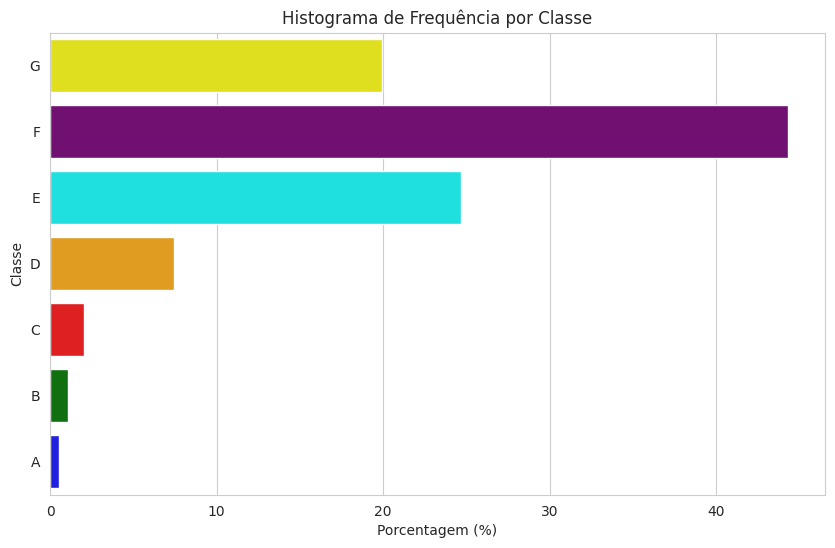

In [32]:
# Valores de frequência e percentual já calculados
resultado = calcular_frequencia_e_percentual(
    df["Classe"], df.shape[0], casas_decimais=2
)

# Dicionário de cores para cada classe
cores = {
    "A": "blue",
    "B": "green",
    "C": "red",
    "D": "orange",
    "E": "purple",
    "F": "yellow",
    "G": "cyan",
}

# Plotar o histograma com as cores especificadas e o nome da coluna
plotar_histograma_com_cores(resultado, "Classe", cores)

In [33]:
# Definindo o estilo do gráfico
# Utilizando a função sns.set_style() para definir o estilo do gráfico como "whitegrid", que adiciona grades de fundo brancas ao gráfico
sns.set_style("whitegrid")

# Criando o gráfico de barras
# Utilizando a função plt.figure() para criar uma figura com o tamanho especificado (10 polegadas de largura por 6 polegadas de altura)
# Utilizando a função sns.barplot() para criar o gráfico de barras com base nos dados do DataFrame distribuicao_de_frequencia_renda
# O eixo x é definido como os índices do DataFrame (as classes de renda) e o eixo y como a coluna "Porcentagem (%)"
plt.figure(figsize=(10, 6))
sns.barplot(data=distribuicao_de_frequencia_renda, x=distribuicao_de_frequencia_renda.index, y="Porcentagem (%)")

# Adicionando rótulos e título
# Utilizando as funções plt.xlabel(), plt.ylabel() e plt.title() para adicionar rótulos aos eixos x e y, e um título ao gráfico, respectivamente
plt.xlabel('Classe de Renda')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de cada Classe de Renda')

# Rotacionando os rótulos do eixo x para melhor visualização
# Utilizando a função plt.xticks() para rotacionar os rótulos do eixo x em 45 graus para melhor legibilidade
plt.xticks(rotation=45)

# Exibindo o gráfico
# Utilizando a função plt.show() para exibir o gráfico criado
plt.show()


NameError: name 'distribuicao_de_frequencia_renda' is not defined

<Figure size 1000x600 with 0 Axes>

        "Decidi adicionar mais classes de renda devido à grande disparidade nos intervalos originais, buscando uma análise mais refinada. Além disso, implementei verificações adicionais e defini uma variável que pode ser ajustada conforme o salário mínimo do ano em estudo."

Com base nos dados fornecidos da Pesquisa Nacional por Amostra de Domicílios - 2015, sobre a distribuição de renda das famílias brasileiras, podemos destacar alguns insights:

1. Desigualdade de renda: A distribuição da renda é bastante desigual, com uma grande concentração de famílias nas classes de menor renda (classes F e G), representando mais de 60% da amostra total.

2. Classe de renda predominante: A classe F, que representa famílias com renda entre 1 e 2 salários mínimos, é a mais frequente, com mais de 44% da amostra total.

3. Baixa representatividade das classes de renda mais alta: As classes A, B e C, que representam famílias com renda superior a 10 salários mínimos, juntas, representam menos de 5% da amostra total, evidenciando uma baixa representatividade de famílias com maior poder aquisitivo na pesquisa.

4. Grande número de famílias com baixa renda: As classes E, F e G, que representam famílias com renda de até 5 salários mínimos, correspondem a mais de 88% da amostra total, indicando que a maioria das famílias pesquisadas possui uma renda considerada baixa.

Esses insights sugerem a necessidade de políticas públicas voltadas para a redução da desigualdade de renda e para o aumento do acesso da população a oportunidades de melhoria socioeconômica, como educação, emprego e saúde.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [ ]:
pessoas_renda_menor_20000 = df[df['Renda'] < 20000].shape[0]

print("Número de pessoas com renda menor que 20000:", pessoas_renda_menor_20000)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
# Dicionário de mapeamento para os valores de sexo, onde 0 representa "Masculino" e 1 representa "Feminino"
Sexo = {0: "Masculino", 1: "Feminino"}

# Dicionário de mapeamento para os valores de cor, onde os números representam diferentes categorias de cor
Cor = {
    0: "Indígena",
    2: "Branca",
    4: "Preta",
    6: "Amarela",
    8: "Parda",
    9: "Sem declaração",
}

# Dicionário de mapeamento para os anos de estudo, onde cada número representa uma categoria de anos de estudo
Anos_de_Estudo = {
    1: "Sem instrução e menos de 1 ano",
    2: "1 ano",
    3: "2 anos",
    4: "3 anos",
    5: "4 anos",
    6: "5 anos",
    7: "6 anos",
    8: "7 anos",
    9: "8 anos",
    10: "9 anos",
    11: "10 anos",
    12: "11 anos",
    13: "12 anos",
    14: "13 anos",
    15: "14 anos",
    16: "15 anos ou mais",
    17: "Não determinados",
}

# Dicionário de mapeamento para os valores de UF (Unidades Federativas), onde os números representam os códigos de cada estado
UF = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal",
}

# Edição do DataFrame original para criar um novo DataFrame modificado
df_modificado = df.copy()

# Mapeamento das colunas Sexo, Cor, Anos de Estudo e UF com base nos dicionários de mapeamento definidos acima
df_modificado["Sexo"] = df_modificado["Sexo"].map(Sexo)
df_modificado["Cor"] = df_modificado["Cor"].map(Cor)
df_modificado["Anos de Estudo"] = df_modificado["Anos de Estudo"].map(Anos_de_Estudo)
df_modificado["UF"] = df_modificado["UF"].map(UF)

# Exibição do DataFrame modificado com as colunas de Sexo e UF mapeadas
df_modificado

In [ ]:
# Lista dos estados brasileiros contendo os nomes de cada estado
estados_brasileiros = [
    "Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins",
    "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco",
    "Alagoas", "Sergipe", "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro",
    "São Paulo", "Paraná", "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul",
    "Mato Grosso", "Goiás", "Distrito Federal"
]

# Filtragem do DataFrame modificado para incluir apenas os estados brasileiros presentes na lista estados_brasileiros
filtro_estados_brasileiros = df_modificado[df_modificado['UF'].isin(estados_brasileiros)]

# Contagem do número de indivíduos em cada estado brasileiro
contagem_por_estado = filtro_estados_brasileiros['UF'].value_counts()

# Exibição do resultado da contagem de indivíduos em cada estado brasileiro
print(contagem_por_estado)

In [ ]:
# Definição das cores a serem utilizadas para representar cada estado no gráfico
cores = [
    "blue",
    "green",
    "red",
    "cyan",
    "magenta",
    "yellow",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "lime",
    "teal",
    "lavender",
    "salmon",
    "peru",
    "tan",
    "gold",
    "indigo",
    "maroon",
    "plum",
    "orchid",
    "turquoise",
    "aqua",
    "coral",
    "steelblue",
]

# Cálculo dos valores percentuais de participação de cada estado em relação ao total
total = contagem_por_estado.sum()
percentuais = (contagem_por_estado / total) * 100

# Criação da figura e dos eixos do gráfico, com tamanho ajustável
fig, ax = plt.subplots(figsize=(12, 6))

# Plotagem do histograma, utilizando cores diferentes para cada barra e exibindo os valores percentuais
bars = percentuais.plot(kind="bar", ax=ax, color=cores)

# Adição dos valores percentuais acima de cada barra do gráfico
for bar in bars.patches:
    ax.annotate(
        "{:.2f}%".format(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# Definição do título e dos rótulos dos eixos do gráfico
ax.set_title(
    "Percentual de Indivíduos Entrevistados por Estado Brasileiro na Pesquisa Nacional por Amostra de Domicílios"
)
ax.set_xlabel("Estado")
ax.set_ylabel("Percentual")

# Rotação dos rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibição do gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Cálculo da frequência de cada sexo presente no DataFrame modificado
frequencia_por_sexo = df_modificado['Sexo'].value_counts()

# Cálculo do total de indivíduos no DataFrame
total_individuos = df_modificado.shape[0]

# Cálculo da frequência em percentual de cada sexo
percentual_por_sexo = (frequencia_por_sexo / total_individuos) * 100

# Criação da figura e dos eixos do gráfico
fig, ax = plt.subplots()

# Plotagem do gráfico de linha, representando os valores percentuais de cada sexo
percentual_por_sexo.plot(kind='line', ax=ax, marker='o', color='green')

# Definição do título e dos rótulos dos eixos do gráfico
ax.set_title('Frequência de Indivíduos por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Percentual')

# Definição dos rótulos do eixo x para melhor representação ("Masculino" e "Feminino")
plt.xticks([0, 1], ['Masculino', 'Feminino'])

# Exibição dos valores em cada ponto da linha do gráfico
for i, v in enumerate(percentual_por_sexo):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center')

# Exibição do gráfico com layout ajustado e grade habilitada
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
def atribuir_classe_faixa_etaria(idade):
    if idade < 18:
        return 'Menores de Idade'
    elif idade < 25:
        return 'Jovens'
    elif idade < 45:
        return 'Jovens Adultos'
    elif idade < 65:
        return 'Meia Idade'
    else:
        return 'Idosos'

def criar_coluna_faixa_etaria(df):
    df['Faixa Etária'] = df['Idade'].apply(atribuir_classe_faixa_etaria)
    return df

# Exemplo de uso:
# Supondo que df_modificado é o seu DataFrame com a coluna 'Idade'
# Substitua df_modificado pelo nome correto do seu DataFrame
df_modificado = criar_coluna_faixa_etaria(df_modificado)
df_modificado


In [ ]:
def calcular_percentual_faixa_etaria(df_modificado):
    total_entrevistados = len(df_modificado)  # Corrigido para calcular o total de entrevistados com base no comprimento do DataFrame
    frequencia_faixa_etaria = df_modificado['Faixa Etária'].value_counts().reset_index()
    frequencia_faixa_etaria.columns = ['Faixa Etária', 'Frequência']
    frequencia_faixa_etaria['Percentual'] = (frequencia_faixa_etaria['Frequência'] / total_entrevistados) * 100
    return frequencia_faixa_etaria
# Substitua df_modificado pelo nome correto do seu DataFrame
frequencia_faixa_etaria = calcular_percentual_faixa_etaria(df_modificado)

In [ ]:
def print_frequencia_faixa_etaria(frequencia_faixa_etaria):
    print("Frequência de Faixas Etárias:")
    print("-----------------------------")
    for index, row in frequencia_faixa_etaria.iterrows():
        faixa_etaria = row['Faixa Etária']
        frequencia = row['Frequência']
        if faixa_etaria == 'Menores de Idade':
            print(f"A faixa etária de {faixa_etaria} é de 0 a 18 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        elif faixa_etaria == 'Jovens':
            print(f"A faixa etária de {faixa_etaria} é de 18 a 25 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        elif faixa_etaria == 'Jovens Adultos':
            print(f"A faixa etária de {faixa_etaria} é de 25 a 45 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        elif faixa_etaria == 'Meia Idade':
            print(f"A faixa etária de {faixa_etaria} é de 45 a 65 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
        else:
            print(f"A faixa etária de {faixa_etaria} é acima de 65 anos, nessa pesquisa foram entrevistados \033[1m{frequencia}\033[0m indivíduos.")
    print("-----------------------------")

# Exemplo de uso:
# Supondo que frequencia_faixa_etaria é o DataFrame retornado pela função contar_frequencia_faixa_etaria
print_frequencia_faixa_etaria(frequencia_faixa_etaria)


In [ ]:
def plotar_grafico_barras(frequencia_faixa_etaria):
    plt.figure(figsize=(12, 8))
    ax = frequencia_faixa_etaria.plot(kind='bar', x='Faixa Etária', y='Percentual', legend=None, color='skyblue')
    ax.set_ylabel('Percentual')
    ax.set_xlabel('Faixa Etária')
    ax.set_title('Percentual de Entrevistados por Faixa Etária')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotar_grafico_barras(frequencia_faixa_etaria)


In [ ]:
def classificacao_de_escolaridade(anos):
    if anos < 9:
        return "Ensino fundamental incompleto"
    elif anos == 9:
        return "Ensino fundamental completo"
    elif anos >= 10 and anos <= 11:
        return "Ensino médio incompleto"
    elif anos == 12:
        return "Ensino médio completo"
    elif anos >= 13 and anos <= 15:
        return "Ensino superior incompleto"
    elif anos == 16:
        return "Ensino superior completo"
    else:
        return "Especializações"

# Aplicando a função ao dataframe df
df['Escolaridade'] = df['Anos de Estudo'].apply(classificacao_de_escolaridade)

# Exibindo o dataframe com a nova coluna
df


In [ ]:
# Calculando a frequência de cada classe de estudo
frequencia = df['Escolaridade'].value_counts()

# Calculando o percentual para cada classe de estudo
percentual = (frequencia / len(df)) * 100
percentual = percentual.round(2)  # Arredondando para 2 casas decimais

# Criando um novo dataframe para armazenar as frequências e percentuais
df_freq_percent = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})

# Exibindo o dataframe com as frequências e percentuais
print(df_freq_percent)


In [ ]:
# Ordenando as classes de escolaridade pelo percentual em ordem decrescente
df_freq_percent_sorted = df_freq_percent.sort_values(by='Percentual', ascending=False)

# Plotando o histograma
plt.figure(figsize=(10, 6))
bars = plt.bar(df_freq_percent_sorted.index, df_freq_percent_sorted['Frequência'], color='skyblue')

# Adicionando o percentual em cima de cada barra
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{df_freq_percent_sorted["Percentual"][i]:.2f}%', ha='center', va='bottom')

plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.title('Histograma de Escolaridade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Calcular a frequência das raças na coluna "Cor"
frequencia_racas = df_modificado['Cor'].value_counts()

# Exibir o resultado
print(frequencia_racas)


In [ ]:
# Calcular o número total de registros
total_registros = len(df_modificado)
percentual_racas = round((frequencia_racas / total_registros) * 100, 2)
# Exibir o resultado
print(percentual_racas)


In [ ]:
# Definir o estilo do gráfico
sns.set_style("whitegrid")

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura

# Plotar as barras
grafico = sns.barplot(x=percentual_racas.index, y=percentual_racas.values, palette="rainbow")

# Adicionar os valores percentuais em cima de cada barra
for p in grafico.patches:
    grafico.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Definir o título e os rótulos dos eixos
plt.title('Distribuição Percentual das Raças')
plt.xlabel('Raça')
plt.ylabel('Percentual')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

In [ ]:
df_modificado


In [ ]:
# Calculando a média aritmética
media_aritmetica = df_modificado['Renda'].mean()
print("Média aritmética da renda:", round(media_aritmetica, 3))

# Calculando a mediana
mediana = df_modificado['Renda'].median()
print("Mediana da renda:", round(mediana, 3))

# Calculando a moda
moda = df_modificado['Renda'].mode()
print("Moda da renda:", moda)

# Calculando o desvio médio absoluto sem usar a função mad
desvio_medio_absoluto = df_modificado['Renda'].apply(lambda x: abs(x - df_modificado['Renda'].median())).mean()
print("Desvio médio absoluto da renda:", round(desvio_medio_absoluto, 3))


# Calculando a variância
variancia = df_modificado['Renda'].var()
print("Variância da renda:", round(variancia, 3))

# Calculando o desvio padrão
desvio_padrao = df_modificado['Renda'].std()
print("Desvio padrão da renda:", round(desvio_padrao, 3))

# Calculando a média, mediana e valor máximo da variável Renda segundo Sexo e Cor
estatisticas_por_grupo = df_modificado.groupby(['Sexo', 'Cor'])['Renda'].agg(['mean', 'median', 'max'])
print("\nMédia, mediana e valor máximo da renda por Sexo e Cor:")
print(estatisticas_por_grupo)


In [ ]:
# Calculando a média, mediana e valor máximo da variável Renda segundo Sexo e Cor
estatisticas_por_grupo = df_modificado.groupby(['Sexo', 'Cor'])['Renda'].agg(['mean', 'median', 'max'])

# Separando os resultados por sexo
resultados_por_sexo = estatisticas_por_grupo.unstack(level=0)

# Plotando os gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Gráfico para média
resultados_por_sexo['mean'].plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Média da Renda por Sexo e Cor')

# Gráfico para mediana
resultados_por_sexo['median'].plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Mediana da Renda por Sexo e Cor')

# Gráfico para valor máximo
resultados_por_sexo['max'].plot(kind='bar', ax=axes[2], color=['blue', 'orange'])
axes[2].set_title('Valor Máximo da Renda por Sexo e Cor')

plt.tight_layout()
plt.show()


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
# Calculando medidas de dispersão da variável Renda segundo Sexo e Cor usando crosstab
medidas_dispersao_por_grupo = pd.crosstab(index=df_modificado['Sexo'], columns=df_modificado['Cor'], 
                                          values=df_modificado['Renda'], aggfunc=['var', 'std'])

# Renomeando as colunas para melhor clareza e arredondando os valores para duas casas decimais
medidas_dispersao_por_grupo.rename(columns={('var', ''): 'Variância', ('std', ''): 'Desvio Padrão'}, inplace=True)
medidas_dispersao_por_grupo = medidas_dispersao_por_grupo.round(2)

print("\nMedidas de dispersão da renda por Sexo e Cor:")
print(medidas_dispersao_por_grupo)


In [ ]:
# Calculando medidas de dispersão da variável Renda segundo Sexo e Cor
medidas_dispersao_por_grupo = df_modificado.groupby(['Sexo', 'Cor'])['Renda'].agg(['var', 'std'])

print("\nMedidas de dispersão da renda por Sexo e Cor:")
print(medidas_dispersao_por_grupo)


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
# Identificando os valores únicos da coluna 'Cor' no DataFrame
valores_cor = df_modificado['Cor'].unique()

# Criando uma paleta de cores correspondente aos valores únicos de 'Cor'
paleta_cores = sns.color_palette("husl", len(valores_cor))
cores = dict(zip(valores_cor, paleta_cores))

# Construindo os boxplots separados por sexo com as cores correspondentes para cada categoria de Cor
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cor', y='Renda', data=df_filtrado[df_filtrado['Sexo'] == 'Masculino'], palette=cores)
plt.title('Boxplot da Renda por Cor (Masculino)')
plt.xlabel('Cor')
plt.ylabel('Renda')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cor', y='Renda', data=df_filtrado[df_filtrado['Sexo'] == 'Feminino'], palette=cores)
plt.title('Boxplot da Renda por Cor (Feminino)')
plt.xlabel('Cor')
plt.ylabel('Renda')

plt.tight_layout()
plt.show()


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:


# Supondo que 'df' seja o DataFrame que contém os dados
# Substitua 'Coluna' pelo nome real da coluna de renda no seu DataFrame
renda_coluna = df['Renda']

# Calcular o percentual de pessoas que ganham um salário mínimo ou menos
percentual_salario_minimo = stats.percentileofscore(renda_coluna, 788, kind='weak')

print(f'O percentual de pessoas que ganham um salário mínimo ou menos é de {percentual_salario_minimo:.2f}%')

# Determinar o valor máximo ganho por 99% das pessoas do dataset
maximo_99_percentil = renda_coluna.quantile(0.99)

print(f'O valor máximo ganho por 99% das pessoas do dataset é de R${maximo_99_percentil:.2f}')


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
# Calcula a tabela cruzada com média, mediana, valor máximo e desvio-padrão
tabela_renda = pd.crosstab(
    df_modificado["Anos de Estudo"],
    df_modificado["Sexo"],
    values=df["Renda"],
    aggfunc=["mean", "median", "max", "std"],
)

# Renomeia as colunas para melhor clareza
tabela_renda.columns = [
    "Média Renda Masculino",
    "Média Renda Feminino",
    "Mediana Renda Masculino",
    "Mediana Renda Feminino",
    "Máximo Renda Masculino",
    "Máximo Renda Feminino",
    "Desvio-padrão Renda Masculino",
    "Desvio-padrão Renda Feminino",
]

# Arredondar os valores para duas casas decimais
tabela_renda = tabela_renda.round(2)

# Criar DataFrame para armazenar os resultados
df_resultado = pd.DataFrame(tabela_renda)

df_resultado


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar dados para incluir apenas pessoas com renda abaixo de R$ 10.000
dados_filtrados = df_modificado.query('Renda < 10000')

# Ordenar os níveis de anos de estudo
anos_de_estudo_ordenados = dados_filtrados['Anos de Estudo'].unique()
anos_de_estudo_ordenados.sort()

# Verificar se há dados para homens e criar o boxplot se houver
dados_masculinos = dados_filtrados[dados_filtrados['Sexo'] == 'Masculino']
if not dados_masculinos.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Anos de Estudo', y='Renda', data=dados_masculinos, order=anos_de_estudo_ordenados)
    plt.title('Renda por Anos de Estudo - Masculino')
    plt.xlabel('Anos de Estudo')
    plt.ylabel('Renda')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Verificar se há dados para mulheres e criar o boxplot se houver
dados_femininos = dados_filtrados[dados_filtrados['Sexo'] == 'Feminino']
if not dados_femininos.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Anos de Estudo', y='Renda', data=dados_femininos, order=anos_de_estudo_ordenados)
    plt.title('Renda por Anos de Estudo - Feminino')
    plt.xlabel('Anos de Estudo')
    plt.ylabel('Renda')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
# Agrupar os dados por UNIDADES DA FEDERAÇÃO e calcular as estatísticas de renda
tabulacao_renda_uf = df_modificado.groupby(["UF"]).agg(
    {"Renda": ["mean", "median", "max", "std"]}
)

# Renomear as colunas para melhor clareza
tabulacao_renda_uf.columns = [
    "Média Renda",
    "Mediana Renda",
    "Máximo Renda",
    "Desvio-padrão Renda",
]

# Arredondar os valores para duas casas decimais
tabulacao_renda_uf = tabulacao_renda_uf.round(2)

df_resultado = pd.DataFrame(tabulacao_renda_uf)

df_resultado

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [ ]:
dados_filtrados = df_modificado[df_modificado['Renda'] < 10000]

# Criar o boxplot da renda por UNIDADES DA FEDERAÇÃO
plt.figure(figsize=(12, 8))
sns.boxplot(x='UF', y='Renda', data=dados_filtrados)
plt.title('Renda por Unidades da Federação')
plt.xlabel('Unidades da Federação')
plt.ylabel('Renda')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
